## Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.patches as mpatches

## Load Data

In [4]:
df = pd.read_csv('new_retail_data.csv')

## Delete column that is not relevant

In [5]:
df.drop(columns=['Transaction_ID','Name','Email',
                 'Phone','Address','City','State','Zipcode',
                 'products','Product_Brand',
                 'Product_Type','Feedback','Total_Purchases',
                 'Amount','Date'], inplace=True)
print(df.head())

   Customer_ID    Country   Age  Gender Income Customer_Segment    Year  \
0      37249.0    Germany  21.0    Male    Low          Regular  2023.0   
1      69749.0         UK  19.0  Female    Low          Premium  2023.0   
2      30192.0  Australia  48.0    Male    Low          Regular  2023.0   
3      62101.0     Canada  56.0    Male   High          Premium  2023.0   
4      27901.0         UK  22.0    Male    Low          Premium  2024.0   

       Month      Time  Total_Amount Product_Category Shipping_Method  \
0  September  22:03:55    324.086270         Clothing        Same-Day   
1   December   8:42:04    806.707815      Electronics        Standard   
2      April   4:06:29   1063.432799            Books        Same-Day   
3        May  14:55:17   2466.854021       Home Decor        Standard   
4    January  16:54:07    248.553049          Grocery        Standard   

  Payment_Method Order_Status  Ratings  
0     Debit Card      Shipped      5.0  
1    Credit Card   Processin

## Filter: Keep only 'Regular' and 'Premium' in customer_segment

In [6]:
print("\n--- Lọc dữ liệu để tập trung vào giá trị 'Regular' và 'Premium' (Loại bỏ giá trị 'New')---")
segments_to_keep = ['Regular', 'Premium']
df = df[df['Customer_Segment'].isin(segments_to_keep)].copy()
print(f"Đã lọc dữ liệu, số dòng còn lại: {len(df)}")
print("Các phân tích từ đây sẽ thực hiện trên 2 nhóm 'Regular' và 'Premium'.\n")


--- Lọc dữ liệu để tập trung vào giá trị 'Regular' và 'Premium' (Loại bỏ giá trị 'New')---
Đã lọc dữ liệu, số dòng còn lại: 210608
Các phân tích từ đây sẽ thực hiện trên 2 nhóm 'Regular' và 'Premium'.



## Preprocessing

In [7]:
df.head()

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Year,Month,Time,Total_Amount,Product_Category,Shipping_Method,Payment_Method,Order_Status,Ratings
0,37249.0,Germany,21.0,Male,Low,Regular,2023.0,September,22:03:55,324.086270,Clothing,Same-Day,Debit Card,Shipped,5.0
1,69749.0,UK,19.0,Female,Low,Premium,2023.0,December,8:42:04,806.707815,Electronics,Standard,Credit Card,Processing,4.0
2,30192.0,Australia,48.0,Male,Low,Regular,2023.0,April,4:06:29,1063.432799,Books,Same-Day,Credit Card,Processing,2.0
3,62101.0,Canada,56.0,Male,High,Premium,2023.0,May,14:55:17,2466.854021,Home Decor,Standard,PayPal,Processing,4.0
4,27901.0,UK,22.0,Male,Low,Premium,2024.0,January,16:54:07,248.553049,Grocery,Standard,Cash,Shipped,1.0


### View data shape

In [8]:
print('Shape of dataframe:', df.shape)

Shape of dataframe: (210608, 15)


### View data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210608 entries, 0 to 302009
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       210395 non-null  float64
 1   Country           210426 non-null  object 
 2   Age               210485 non-null  float64
 3   Gender            210373 non-null  object 
 4   Income            210411 non-null  object 
 5   Customer_Segment  210608 non-null  object 
 6   Year              210373 non-null  float64
 7   Month             210428 non-null  object 
 8   Time              210362 non-null  object 
 9   Total_Amount      210352 non-null  float64
 10  Product_Category  210414 non-null  object 
 11  Shipping_Method   210371 non-null  object 
 12  Payment_Method    210406 non-null  object 
 13  Order_Status      210444 non-null  object 
 14  Ratings           210467 non-null  float64
dtypes: float64(5), object(10)
memory usage: 25.7+ MB


### Check for duplicate rows

In [10]:
num_duplicate_rows = df.duplicated().sum()
print('Number of duplicated rows in dataset:', num_duplicate_rows)

Number of duplicated rows in dataset: 46


### Remove duplicate rows and check unique value

In [11]:
df = df.drop_duplicates()
unique_counts = df.nunique()
print(unique_counts)

Customer_ID          81198
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         2
Year                     2
Month                   12
Time                 78762
Total_Amount        208926
Product_Category         5
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
dtype: int64


### Check for missing values

In [12]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
print(missing_data)
print(missing_values.sum())

                  Missing Values  Percentage (%)
Customer_ID                  213        0.101158
Country                      182        0.086435
Age                          123        0.058415
Gender                       235        0.111606
Income                       197        0.093559
Customer_Segment               0        0.000000
Year                         235        0.111606
Month                        180        0.085486
Time                         246        0.116830
Total_Amount                 256        0.121579
Product_Category             194        0.092134
Shipping_Method              236        0.112081
Payment_Method               202        0.095934
Order_Status                 164        0.077887
Ratings                      141        0.066964
2804


### Remove rows with missing values

In [13]:
df = df.dropna()
print(f"Số dòng sau khi xóa các giá trị thiếu: {len(df)}")

Số dòng sau khi xóa các giá trị thiếu: 207766


### Convert month year data

In [14]:
df['Month_Year'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
years = ['2023.0', '2024.0']

month_year_order = [f"{month}-{year}" for year in years for month in months]

df['Month_Year'] = pd.Categorical(df['Month_Year'],categories=month_year_order,
                                  ordered=True)
df.drop(columns=['Month', 'Year'], inplace=True)

### Convert time data and divide into 24 hour groups

In [15]:
df["Time_dt"] = pd.to_datetime(df["Time"], format="%H:%M:%S")

df["Hour"] = df["Time_dt"].dt.hour
df["Minute"] = df["Time_dt"].dt.minute

df["Hour_Group"] = df.apply(
    lambda row: (row["Hour"] if row["Minute"] < 30 else (row["Hour"] + 1) % 24),
    axis=1)
df.drop(columns=['Time', 'Time_dt', 'Hour', 'Minute'], inplace=True)
df["Hour_Group"] = pd.Categorical(df["Hour_Group"], categories=range(24), ordered=True)

### Analyze correlation using T-test between continuous variables and dependent variable (customer_segment)

In [16]:
numerical_vars = ['Age', 'Total_Amount']

print("\n--- Phân tích tương quan T-test cho các biến số ---")
for var in numerical_vars:
    try:
        group1 = df[df['Customer_Segment'] == 'Regular'][var]
        group2 = df[df['Customer_Segment'] == 'Premium'][var]

        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

        print(f"{var}: t = {t_stat:.4f}, p = {p_val:.4f}")
        if p_val < 0.05:
            print(f"   → Biến '{var}' có khác biệt có ý nghĩa giữa 2 nhóm.")
        else:
            print(f"   → Biến '{var}' KHÔNG có khác biệt rõ rệt giữa 2 nhóm.")
    except Exception as e:
        print(f"{var}: lỗi khi tính T-test: {e}")


--- Phân tích tương quan T-test cho các biến số ---
Age: t = -134.3503, p = 0.0000
   → Biến 'Age' có khác biệt có ý nghĩa giữa 2 nhóm.
Total_Amount: t = 0.9461, p = 0.3441
   → Biến 'Total_Amount' KHÔNG có khác biệt rõ rệt giữa 2 nhóm.


### Analyze correlation using Chi-square test between categorical variables and dependent variable (customer_segment)

In [17]:
categorical_vars = ['Gender','Income','Country','Product_Category',
                    'Shipping_Method','Payment_Method','Order_Status',
                    'Ratings','Hour_Group', 'Month_Year']

print("\n--- Phân tích Chi-square cho các biến phân loại ---")
for var in categorical_vars:
    try:
        ct = pd.crosstab(df[var], df['Customer_Segment'])

        if ct.shape[1] != 2:
            print(f"{var}: bỏ qua (không phải phân loại nhị phân)")
            continue

        chi2, p, dof, expected = chi2_contingency(ct)

        print(f"{var}: chi2 = {chi2:.4f}, p = {p:.4f}")
        if p < 0.05:
            print(f"   → Biến '{var}' có liên hệ với nhóm Customer_Segment.")
        else:
            print(f"   → Biến '{var}' KHÔNG có liên hệ rõ rệt.")
    except Exception as e:
        print(f"{var}: lỗi khi chạy Chi-square: {e}")


--- Phân tích Chi-square cho các biến phân loại ---
Gender: chi2 = 132.5698, p = 0.0000
   → Biến 'Gender' có liên hệ với nhóm Customer_Segment.
Income: chi2 = 5036.1010, p = 0.0000
   → Biến 'Income' có liên hệ với nhóm Customer_Segment.
Country: chi2 = 2630.1790, p = 0.0000
   → Biến 'Country' có liên hệ với nhóm Customer_Segment.
Product_Category: chi2 = 222.7648, p = 0.0000
   → Biến 'Product_Category' có liên hệ với nhóm Customer_Segment.
Shipping_Method: chi2 = 36.4048, p = 0.0000
   → Biến 'Shipping_Method' có liên hệ với nhóm Customer_Segment.
Payment_Method: chi2 = 609.5751, p = 0.0000
   → Biến 'Payment_Method' có liên hệ với nhóm Customer_Segment.
Order_Status: chi2 = 6428.6705, p = 0.0000
   → Biến 'Order_Status' có liên hệ với nhóm Customer_Segment.
Ratings: chi2 = 3189.8195, p = 0.0000
   → Biến 'Ratings' có liên hệ với nhóm Customer_Segment.
Hour_Group: chi2 = 23.6580, p = 0.4229
   → Biến 'Hour_Group' KHÔNG có liên hệ rõ rệt.
Month_Year: chi2 = 9650.0549, p = 0.0000
  

## Analyze and Visualize data

### Analyze proportion difference between 'Regular' and 'Premium' in categorical variables (difference >= 40%)


--- Phân tích tỷ lệ Regular vs Premium theo từng biến phân loại ---

>>> Biến 'Gender' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Gender                                        
Male              0.296399  0.703601  0.407203


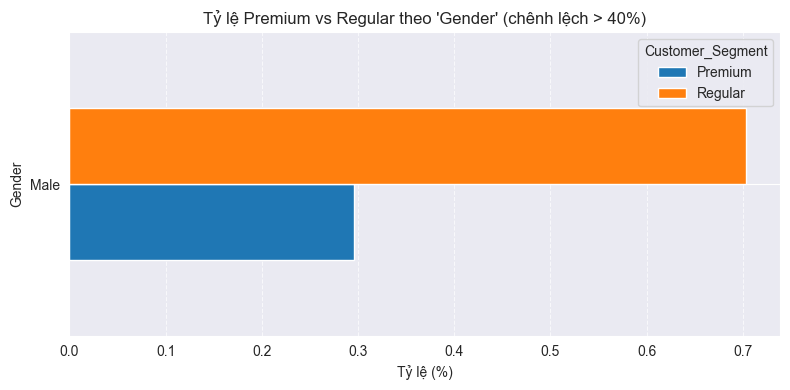


>>> Biến 'Income' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Income                                        
High              0.217744  0.782256  0.564511
Medium            0.292814  0.707186  0.414371


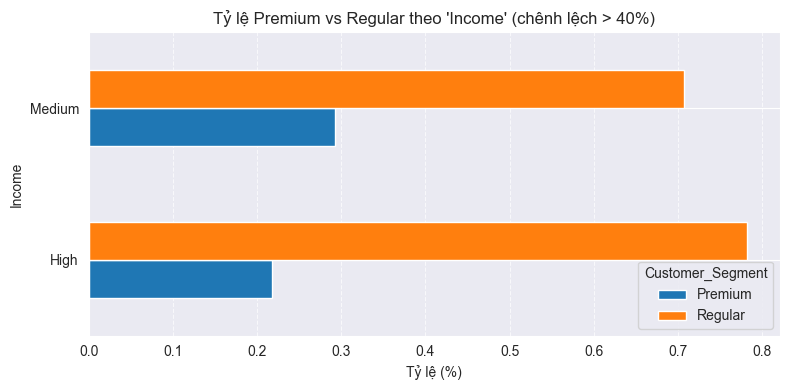


>>> Biến 'Country' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Country                                       
UK                0.243855  0.756145  0.512289
USA               0.279508  0.720492  0.440985


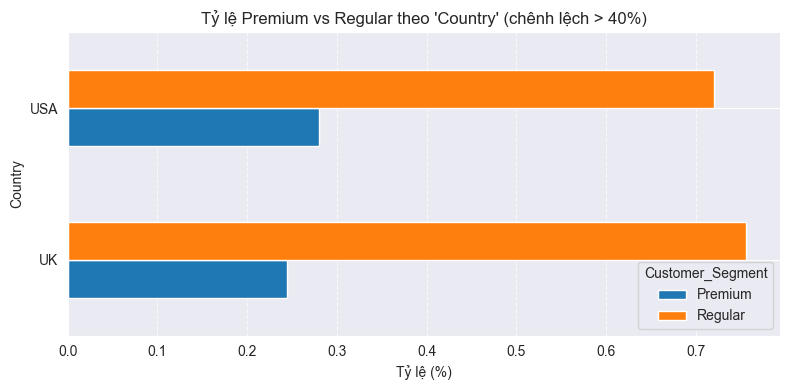


>>> Biến 'Product_Category' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Product_Category                              
Electronics       0.296831  0.703169  0.406339
Home Decor        0.297036  0.702964  0.405928
Books             0.297539  0.702461  0.404922
Clothing          0.298258  0.701742  0.403484


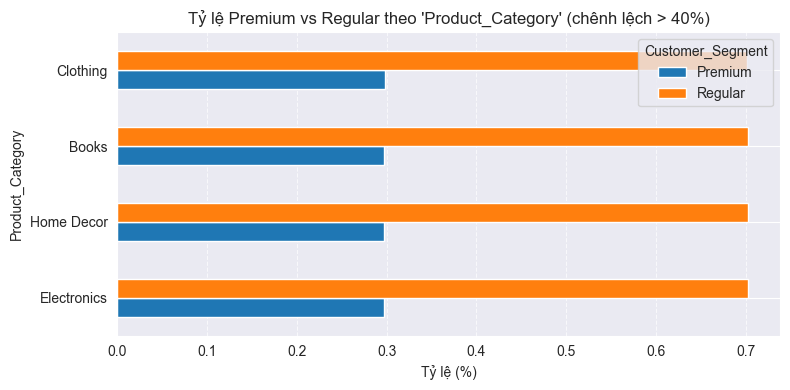


>>> Biến 'Shipping_Method' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Shipping_Method                               
Standard          0.296519  0.703481  0.406963


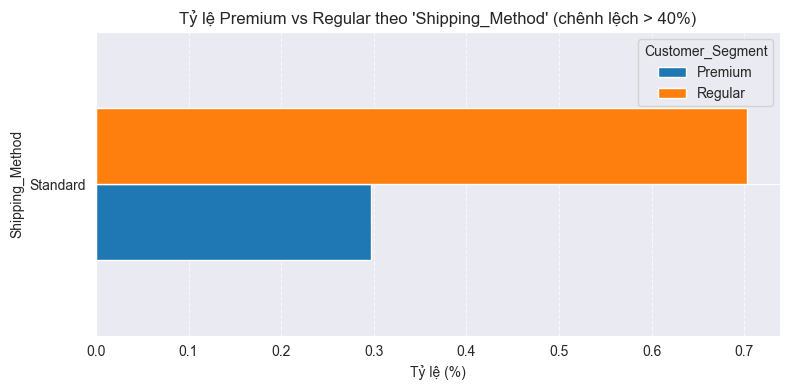


>>> Biến 'Payment_Method' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Payment_Method                                
PayPal            0.264388  0.735612  0.471224


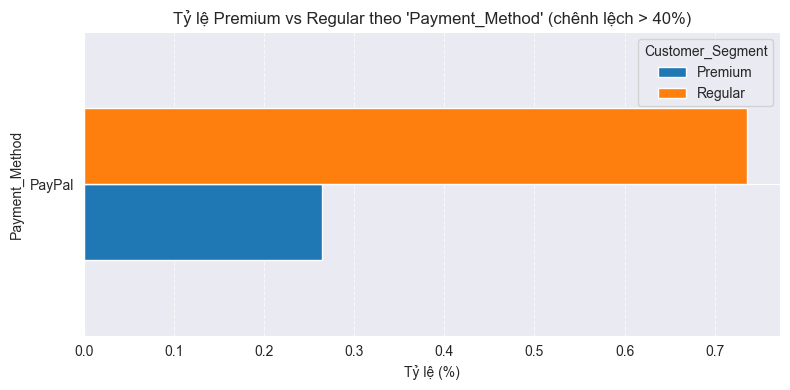


>>> Biến 'Order_Status' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment  Premium  Regular    Diff
Order_Status                              
Delivered          0.2191   0.7809  0.5618


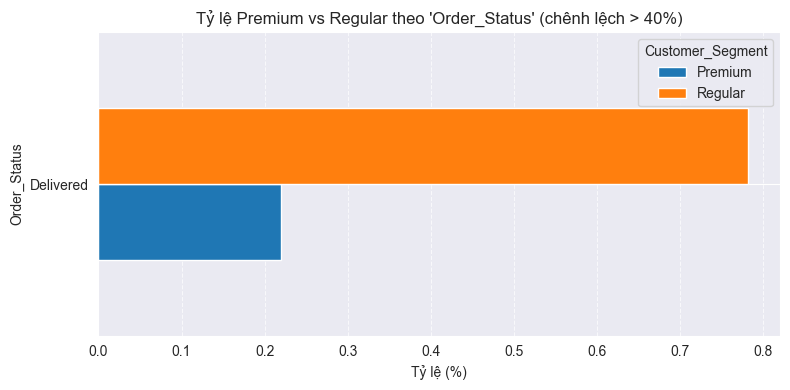


>>> Biến 'Ratings' có giá trị chênh lệch lớn (>|40%|):
Customer_Segment   Premium   Regular      Diff
Ratings                                       
1.0               0.197452  0.802548  0.605095
2.0               0.261230  0.738770  0.477540


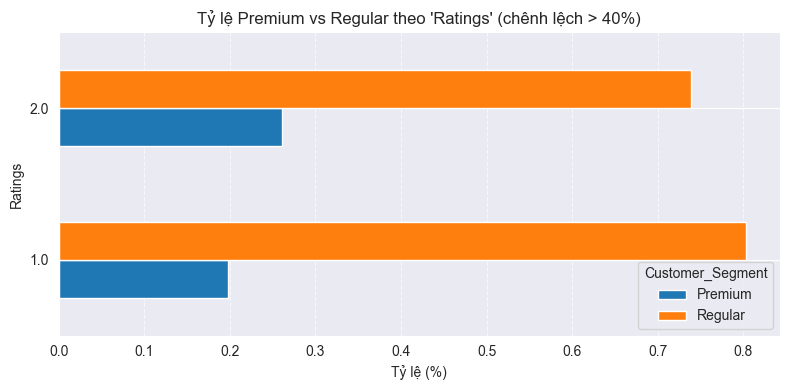

In [18]:
print("\n--- Phân tích tỷ lệ Regular vs Premium theo từng biến phân loại ---")

important_cats = ['Gender','Income','Country','Product_Category',
                    'Shipping_Method','Payment_Method','Order_Status','Ratings']

diff_threshold = 0.4

for var in important_cats:
    try:
        ct = pd.crosstab(df[var], df['Customer_Segment'], normalize='index')
        ct['Diff'] = abs(ct['Premium'] - ct['Regular'])

        sig_diff = ct[ct['Diff'] >= diff_threshold].sort_values('Diff', ascending=False)

        if not sig_diff.empty:
            print(f"\n>>> Biến '{var}' có giá trị chênh lệch lớn (>|{diff_threshold*100:.0f}%|):")
            print(sig_diff)

            sig_diff[['Premium', 'Regular']].plot(kind='barh', figsize=(8, 4), color=['#1f77b4', '#ff7f0e'])
            plt.title(f"Tỷ lệ Premium vs Regular theo '{var}' (chênh lệch > {diff_threshold*100:.0f}%)")
            plt.xlabel("Tỷ lệ (%)")
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"{var}: lỗi khi phân tích tỷ lệ: {e}")

### Plot age distribution by customer segment

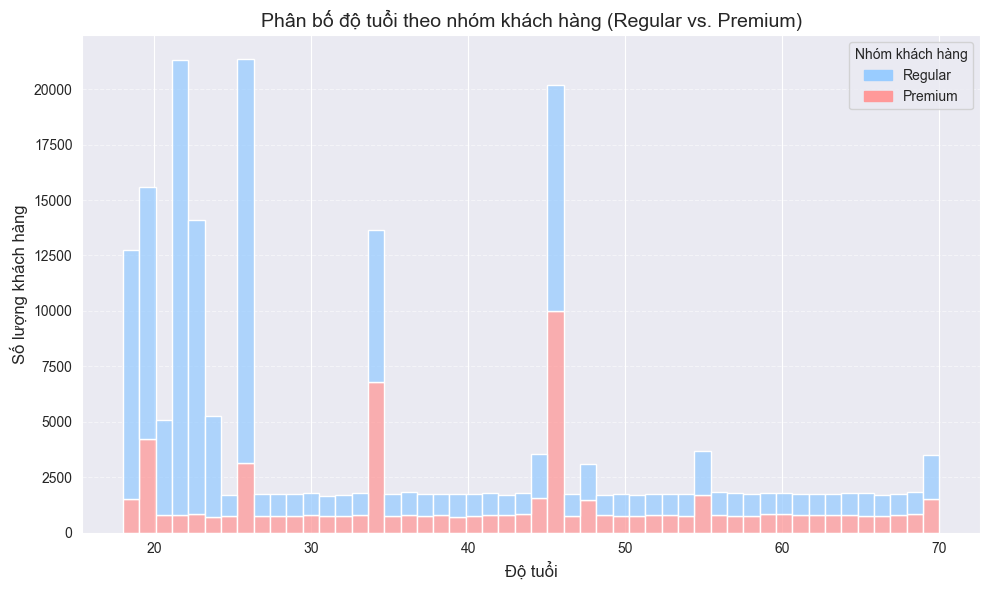

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Customer_Segment', multiple='stack',
             bins=50, palette={'Premium': '#ff9999', 'Regular': '#99ccff'})

plt.title("Phân bố độ tuổi theo nhóm khách hàng (Regular vs. Premium)", fontsize=14)
plt.xlabel("Độ tuổi", fontsize=12)
plt.ylabel("Số lượng khách hàng", fontsize=12)

legend_labels = [
    mpatches.Patch(color='#99ccff', label='Regular'),
    mpatches.Patch(color='#ff9999', label='Premium')
]
plt.legend(handles=legend_labels, title="Nhóm khách hàng")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Plot month_year distribution by customer segment

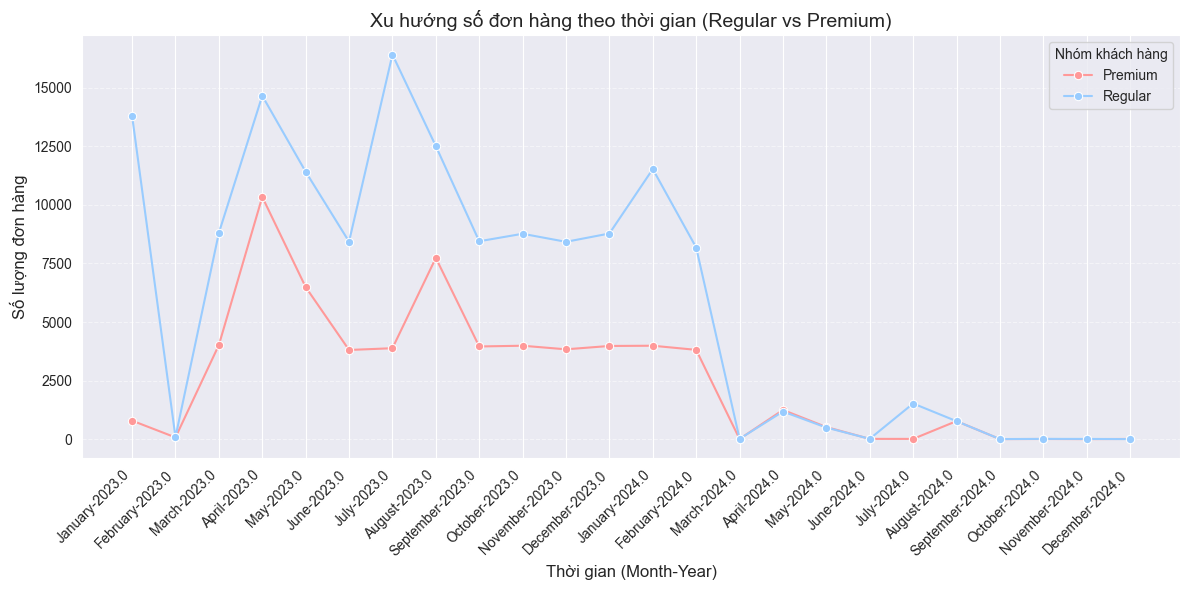

In [20]:
orders_by_month = df.groupby(['Month_Year', 'Customer_Segment']).size().reset_index(name='Order_Count')

plt.figure(figsize=(12, 6))

sns.lineplot(data=orders_by_month, x='Month_Year', y='Order_Count', hue='Customer_Segment',
             palette={'Premium': '#ff9999', 'Regular': '#99ccff'}, marker='o')

plt.title("Xu hướng số đơn hàng theo thời gian (Regular vs Premium)", fontsize=14)
plt.xlabel("Thời gian (Month-Year)", fontsize=12)
plt.ylabel("Số lượng đơn hàng", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Nhóm khách hàng")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
